# Exploración datos NetCDF
## Yuritzy Pérez Corona 07/09/2023
#### Primera exploración de los datos NetCDF del Dopplerscatt en python. Solo para un archivo.
#### Dataset: S-MODE Dopplerscatt

#### Primero carga los datos

In [1]:
# Todo lo necesario para a exploración
from netCDF4 import Dataset as NetCDFFile
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# import netcdftime as nctime # Todavía no lo puedo instalar

#### Se lee el archivo

In [2]:
ncfile = NetCDFFile("dopplerscatt_20211020_140315.tomoL2CF.nc", "r") #Carga el archivo

In [3]:
print(ncfile.data_model) #Tipo de datos

NETCDF4


### Variables
#### Acceso a las variables

In [4]:
# Información sobre las dimensiones
ncfile.dimensions
# Información sobre las variables
ncfile.variables

{'x': <class 'netCDF4._netCDF4.Variable'>
 float64 x(x)
     standard_name: projection_x_coordinate
     long_name: UTM easting
     units: m
     valid_min: -1000000.0
     valid_max: 1000000.0
     coverage_content_type: coordinate
 unlimited dimensions: 
 current shape = (958,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 float64 y(y)
     standard_name: projection_y_coordinate
     long_name: UTM northing
     units: m
     valid_min: -1000000.0
     coverage_content_type: coordinate
     valid_max: 10000000.0
 unlimited dimensions: 
 current shape = (547,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(y, x)
     valid_max: 90.0
     standard_name: latitude
     long_name: Measurement center latitude
     coverage_content_type: coordinate
     valid_min: -90.0
     units: degrees_north
 unlimited dimensions: 
 current shape = (547, 958)
 f

In [5]:
lat = ncfile.variables["latitude"] #Carga La latitud en la variable lat

In [6]:
lon = ncfile.variables["longitude"] #Carga la longitud en la variable lon

In [7]:
line = ncfile.variables["line"] #Carga en line la variable line

In [8]:
nobs = ncfile.variables["nobs_all_lines"] #Número total de observaciones

In [9]:
wind = ncfile.variables["wind_speed_line"] #Velocidad del viento por linea

In [10]:
motime = ncfile.variables["mean_observation_time"]# Tiempo promedio de las observaciones por linea

#### Para trabajar con el tiempo primero se le deben cambiar las unidades, actualmente se encuentra en "ModifierJulian Date" que se expresa en los días desde 1950-01-01 T00:00:00Z, por lo cual se debe pasar al calendario gregoriano.

In [11]:
# Algunos valores NaN fueron localizados, por lo que vamos a proceder a remplazarlos para poder trabajar con las fechas
# motime=np.array([datetime.datetime(1950,1,1),np.nan,datetime.datetime(1960,2,15),np.nan])
# julian_default=np.datetime64('1950-01-01')
# motime=np.where(np.isnat(motime),julian_default,motime)
# Accedemos primero a las unidades y a la informacion del calendario de los atributos
# motime_units = motime.units
# Convertiremos los valores de tiempo a objetos datetime
# dates=nc.num2date(motime[:],units=motime_units, calendar='proleptic_gregorian')

In [12]:
#datetime.datetime(1858,11,17)+ datetime.timedelta(days=motime)
#print("Gregorian Date:", dates)
#plt.plot(dates[1,1:500,1:500])

#### El plan era explorar todas las variables pero mi asesor me comentó que hay dos más importantes por el momento (las de las corrientes), así que esas son las que capturo a continuación

In [13]:
U=ncfile.variables["u_current_all_lines"] #Componente de la corriente en X
V=ncfile.variables["v_current_all_lines"] #Componente de la corriente en Y

In [14]:
print(lat) # Para observar las características de la variable

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(y, x)
    valid_max: 90.0
    standard_name: latitude
    long_name: Measurement center latitude
    coverage_content_type: coordinate
    valid_min: -90.0
    units: degrees_north
unlimited dimensions: 
current shape = (547, 958)
filling on, default _FillValue of 9.969209968386869e+36 used


In [15]:
type(lon)

netCDF4._netCDF4.Variable

### Primeros gráficos

Text(0.5, 1.0, 'Recorrido Dopplerscat')

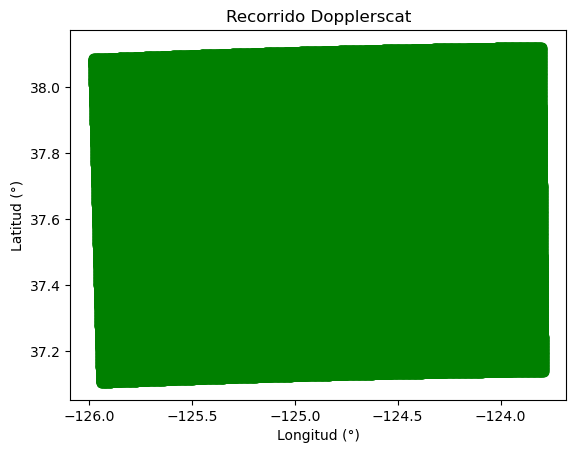

In [16]:
plt.scatter(lon[:,:],lat[:,:], color='green') #Graficar el recorrido
plt.xlabel('Longitud (°)')
plt.ylabel('Latitud (°)')
plt.title('Recorrido Dopplerscat')

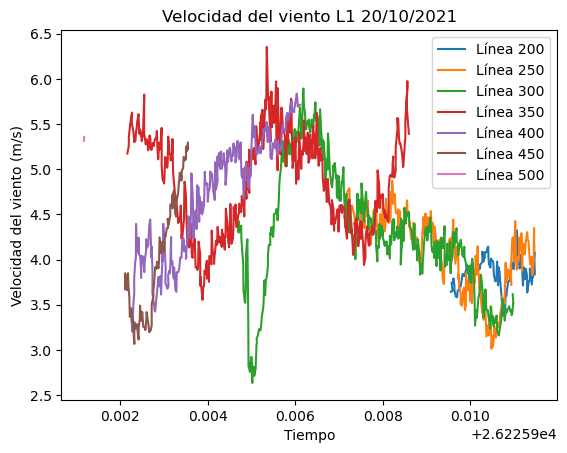

In [44]:
fig,ax =plt.subplots()
ax.plot(motime[1,200,:],wind[1,200,:], label='Línea 200')
ax.plot(motime[1,250,:],wind[1,250,:], label='Línea 250')
ax.plot(motime[1,300,:],wind[1,300,:], label='Línea 300') #Se comienza por graficar solamente en una línea una columna de la velocidad del viento
# No pude covertir el tiempo, quiza me lleve algunas horas más >.<
ax.plot(motime[1,350,:],wind[1,350,:], label='Línea 350')
ax.plot(motime[1,400,:],wind[1,400,:], label='Línea 400')
ax.plot(motime[1,450,:],wind[1,450,:], label='Línea 450')
ax.plot(motime[1,500,:],wind[1,500,:], label='Línea 500')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Velocidad del viento (m/s)')
ax.set_title('Velocidad del viento L1 20/10/2021')
ax.legend()
plt.show()

#### Gráficos de las variables de importancia
##### Se intentó realizar un grafico donde estuvieran las variables completas, sin embargo resultó muy dificil comprender lo que sucedia, por lo que se guardó la figura para poder ver a detalle qué graficar.

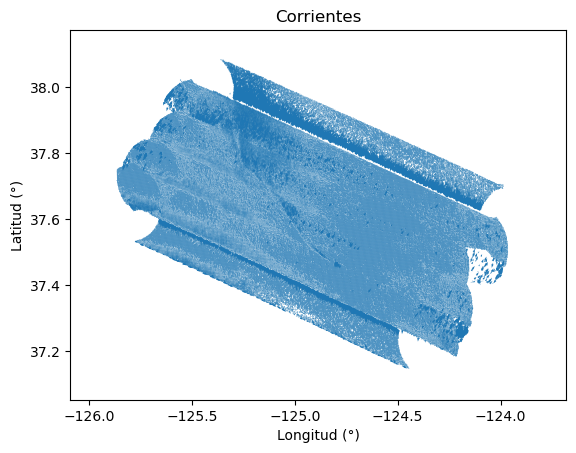

<Figure size 640x480 with 0 Axes>

In [32]:
# plot
fig, ax = plt.subplots()

ax.quiver(lon, lat, U, V, color="C0", angles='xy', scale_units='xy', scale=300, width=.0015) # Se utilizó quiver porque lo que se quiere representar son los vectores de las corrientes en ambas componentes

#ax.set(xlim=(-5, 5), ylim=(-5, 5))
plt.xlabel('Longitud (°)')
plt.ylabel('Latitud (°)')
plt.title('Corrientes en el recorrido completo')

plt.show()
plt.ion() #Habiblita modo interactivo

# Guardar figura
plt.savefig('Corrientestotal.png', dpi=450)

##### Se optó por seccionar la figura en varios mallados, que se muestran a cotinuación

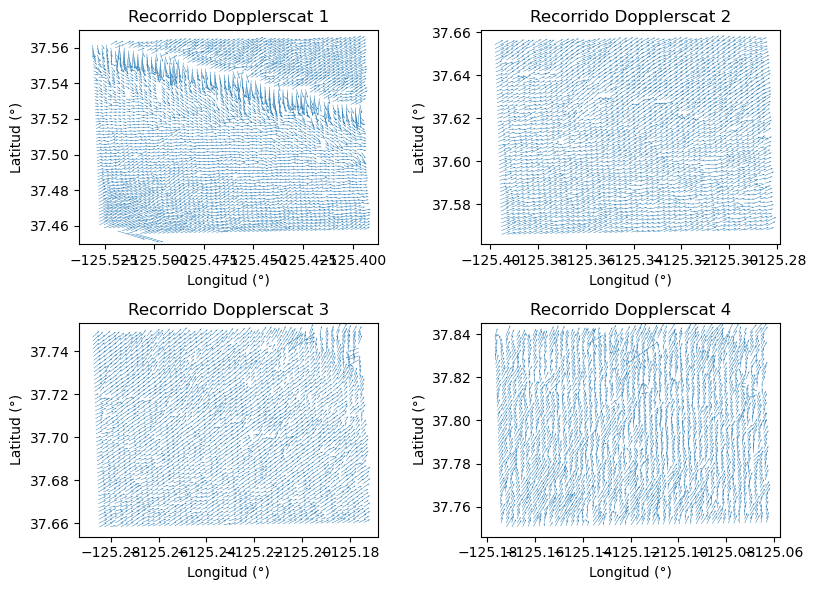

In [45]:
# plot
fig, axs = plt.subplots(2,2, figsize=(8,6)) #Crear Subplots


# Primer subplot
axs[0, 0].quiver(lon[190:250,190:250], lat[190:250,190:250], U[190:250,190:250], V[190:250,190:250], color="C0", angles='xy', scale_units='xy', scale=300, width=.0015)
axs[0, 0].set_xlabel('Longitud (°)')
axs[0, 0].set_ylabel('Latitud (°)')
axs[0, 0].set_title('Corrientes: Recorrido Dopplerscat 1')
#ax.set(xlim=(-5, 5), ylim=(-5, 5))


axs[0, 1].quiver(lon[250:300,250:300], lat[250:300,250:300], U[250:300,250:300], V[250:300,250:300], color="C0", angles='xy', scale_units='xy', scale=300, width=.0015)
axs[0, 1].set_xlabel('Longitud (°)')
axs[0, 1].set_ylabel('Latitud (°)')
axs[0, 1].set_title('Corrientes: Recorrido Dopplerscat 2')
#ax.set(xlim=(-5, 5), ylim=(-5, 5))

axs[1, 0].quiver(lon[300:350,300:350], lat[300:350,300:350], U[300:350,300:350], V[300:350,300:350], color="C0", angles='xy', scale_units='xy', scale=300, width=.0015)
axs[1, 0].set_xlabel('Longitud (°)')
axs[1, 0].set_ylabel('Latitud (°)')
axs[1, 0].set_title('Corrientes: Recorrido Dopplerscat 3')

axs[1, 1].quiver(lon[350:400,350:400], lat[350:400,350:400], U[350:400,350:400], V[350:400,350:400], color="C0", angles='xy', scale_units='xy', scale=300, width=.0015)
axs[1, 1].set_xlabel('Longitud (°)')
axs[1, 1].set_ylabel('Latitud (°)')
axs[1, 1].set_title('Corrientes: Recorrido Dopplerscat 4')

plt.tight_layout() #Prevenir que se overlap
plt.show() #Mostrar figura


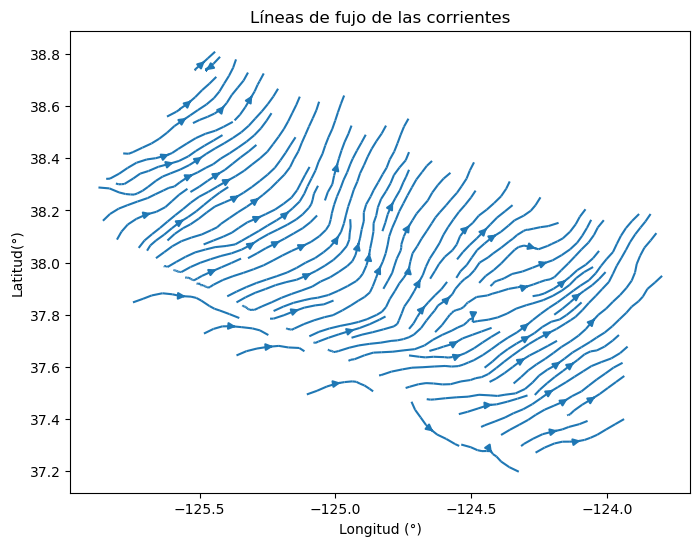

In [43]:
# plot:
fig, ax = plt.subplots(figsize=(8,6))
x=np.linspace(-126,-123.5,958)
y=np.linspace(37,39,547)
X,Y=np.meshgrid(x,y)
stream=ax.streamplot(X, Y, U, V, density=2) #Falta hacerlo con la latitud y la longitud, pero tiene un problema que no he podido determinar
ax.set_xlabel('Longitud (°)')
ax.set_ylabel('Latitud(°)')
ax.set_title('Líneas de fujo de las corrientes')

plt.show()

In [46]:
### ==== Gracias a ChatGPT 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear una figura y ejes con una proyección específica (por ejemplo, proyección de Mercator)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})

# Agregar características del mapa, como líneas de costa y límites políticos
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Agregar tus datos o gráficos en el mapa
# Por ejemplo, puedes trazar puntos o líneas geográficas aquí

# Personalizar el gráfico según sea necesario
ax.set_title('Gráfico con Línea de Costa')

# Mostrar el gráfico
plt.show()

ModuleNotFoundError: No module named 'cartopy'

### Conclusiones:

#### Se menciona la necesidad de analizar detenidamente los datos, especialmente aquellos organizados en matrices de 3x3. Estas matrices parecen representar mediciones en una cuadrícula o malla, donde la primera dimensión indica la línea de la cuadrícula, y las dos dimensiones siguientes representan columnas de datos a lo largo de esa cuadrícula.

#### Se plantea la preocupación de que calcular promedios podría afectar la información y la escala de los datos. Esto es importante considerar al procesar los datos para evitar la pérdida de información o distorsiones.

#### Se realizó un curso intensivo de Python durante el fin de semana (), lo que sugiere que estoy aprendiendo a utilizar este lenguaje de programación para el análisis de datos.

### Recomendaciones y Pendientes:

#### Se señala que falta tiempo para poder convertir las unidades de tiempo Juliano a Gregoriano. Esto es un paso importante si se trabaja con datos cronológicos y requiere una conversión adecuada de las fechas. Puede ser un desafío técnico, pero es necesario para interpretar correctamente los datos.

#### Se recomienda realizar la división de las secciones en el subplot de acuerdo con la ubicación geográfica. Esto implica una clasificación geográfica de los datos y, posiblemente, la creación de subplots específicos para cada región geográfica. La utilización de declaraciones condicionales (como "if" en Python) podría ser útil para esta tarea.

#### Se sugiere agregar la línea de costa a los gráficos para una representación más realista y una mejor comprensión de la ubicación geográfica de los datos. Esto puede mejorar la visualización y la interpretación de los resultados.